# Predictive ML Project
- 🖤  Author : [Hailey Hanson](https://github.com/haileylhanson/)
- 🖤  Repository : [datafun-07-ml](https://github.com/haileylhanson/datafun-07-ml)
- 🖤  Date : October 2025 
- 🖤  Purpose : 

### Imports

In [4]:
import sys
print(sys.executable)

/Users/haileyhanson/Repos/.venv/bin/python


In [5]:
import sys
!{sys.executable} -m pip install scipy


  Using cached scipy-1.16.2-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
Using cached scipy-1.16.2-cp313-cp313-macosx_14_0_arm64.whl (20.9 MB)


In [6]:
#Imports
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.axes import Axes
from scipy import stats

#Local Imports


### Part 1 - Chart a Straight Line

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


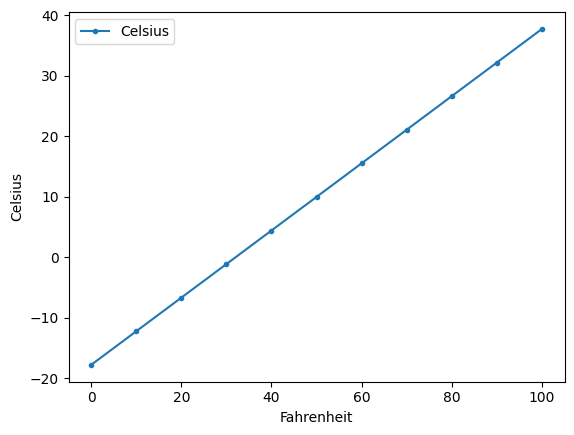

In [7]:
# use Pandas DataFrames to plot Celsius vs Fahrenheit 

c = lambda f: 5/9 * (f-32)
temps = [(f, c(f)) for f in range (0, 101, 10)]
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.head(3)


In [8]:
nyc.Date.dtype
pd.set_option('display.precision', 2)
nyc.Temperature.describe()



count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

In [9]:
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)


### Part 2 - Prediction

### Part 3 - Prediction

### Part 4 - Insights